# Results

In [28]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#plt.style.use(['science', 'ieee'])
figsize = (6,5)
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [29]:
df = pd.read_csv("../data/results/Jun-22-2022.csv")
df['group'] = df.features.str.split('_', expand=True)[0] + '-' + df.model

to_replace = {
    'hos': 'HOS',
    'tsfresh': 'TSF',
    'CoxNet':'CN',
    'GBSA':'GBS'
}

df.group = df.group.replace(to_replace, regex=True)

def replace(group):
    # Replace outliers with mean
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3 * std
    group[outliers] = mean        # or "group[~outliers].mean()"
    return group


df['time'] = df.groupby('model').time.transform(replace).values

In [30]:
df.groupby('group').agg({'score':['mean','std'], 'time':['mean','std']})

score                 time           
             mean       std       mean        std
group                                            
HOS-CN   0.556223  0.089857   0.005380   0.006157
HOS-GBS  0.744069  0.073642   1.751456   1.506497
HOS-RSF  0.702662  0.084348  14.623201  12.185094
TSF-CN   0.606035  0.106094   0.019359   0.002394
TSF-GBS  0.764405  0.085486   9.724199   2.274978
TSF-RSF  0.774428  0.090319  27.594938  24.242096

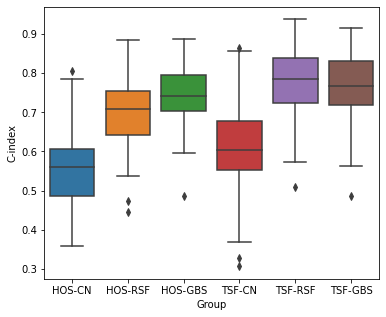

In [42]:
f, ax = plt.subplots(figsize=figsize)
#plt.grid('both')
sns.boxplot(x='group', y='score', data=df, ax=ax)
ax.set_ylabel('C-index')
ax.set_xlabel('Group')
#ax.set_ylim([0,1])
#sns.despine()
plt.savefig('../fig/boxplot-score.eps', bbox_inches='tight')

In [18]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

f_oneway(df[df.group == 'HOS-CN']['score'].tolist(),
    df[df.group == 'HOS-RSF']['score'].tolist(),
    df[df.group == 'HOS-GBS']['score'].tolist(),
    df[df.group == 'TSF-CN']['score'].tolist(),
    df[df.group == 'TSF-RSF']['score'].tolist(),
    df[df.group == 'TSF-GBS']['score'].tolist()
    )

F_onewayResult(statistic=103.1441627529637, pvalue=3.003632114425056e-78)

In [19]:
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
 HOS-CN HOS-GBS   0.1878    0.0  0.1519  0.2238   True
 HOS-CN HOS-RSF   0.1464    0.0  0.1105  0.1824   True
 HOS-CN  TSF-CN   0.0498 0.0012  0.0139  0.0857   True
 HOS-CN TSF-GBS   0.2082    0.0  0.1723  0.2441   True
 HOS-CN TSF-RSF   0.2182    0.0  0.1823  0.2541   True
HOS-GBS HOS-RSF  -0.0414 0.0132 -0.0773 -0.0055   True
HOS-GBS  TSF-CN   -0.138    0.0 -0.1739 -0.1021   True
HOS-GBS TSF-GBS   0.0203 0.5863 -0.0156  0.0562  False
HOS-GBS TSF-RSF   0.0304  0.152 -0.0056  0.0663  False
HOS-RSF  TSF-CN  -0.0966    0.0 -0.1325 -0.0607   True
HOS-RSF TSF-GBS   0.0617    0.0  0.0258  0.0977   True
HOS-RSF TSF-RSF   0.0718    0.0  0.0359  0.1077   True
 TSF-CN TSF-GBS   0.1584    0.0  0.1225  0.1943   True
 TSF-CN TSF-RSF   0.1684    0.0  0.1325  0.2043   True
TSF-GBS TSF-RSF     0.01 0.9678 -0.0259  0.0459  False
----------